In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:
df = pd.read_csv("/content/credit_risk_dataset.csv")

In [19]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y  

In [20]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [21]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.dropna(inplace=True)

In [22]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [23]:

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.8371950283872948
Confusion Matrix:
 [[4820  252]
 [ 809  636]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.55      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.70      0.72      6517
weighted avg       0.83      0.84      0.82      6517



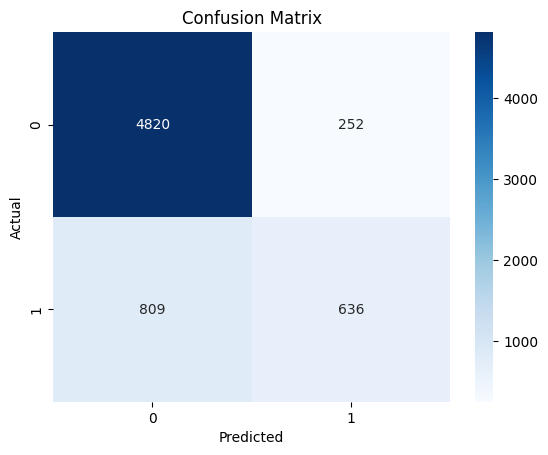

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve


In [31]:
y_prob = model.predict_proba(X_test)[:, 1]

In [32]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.8433573837774115


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

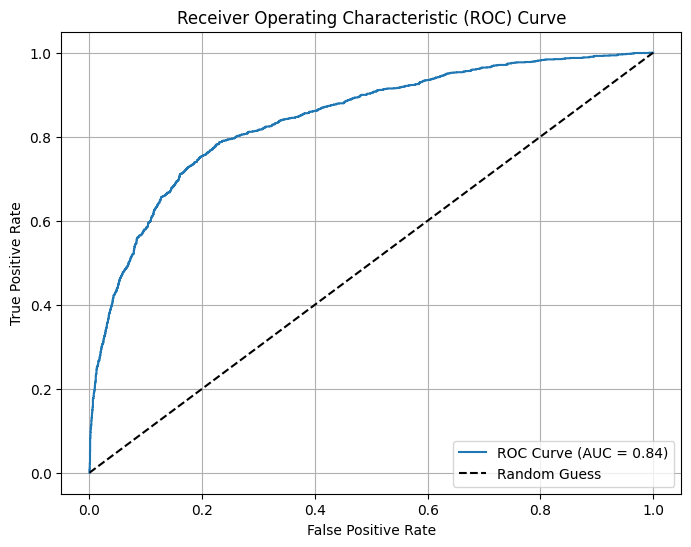

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()